In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import pandas as pd
import statsmodels.api as sm       
from statsmodels.formula.api import ols, logit
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
total_data = pd.read_csv('docking_data.csv')



# Definitions
`(type_of_complex_in_group) middle-1 border-2 centroid-3`

`(is_real) Yes-1 No-0`

In [5]:
total_data.head()

E_fst  E_fst_elstat  E_fst_VdW  E_fst_SP  group_size  \
0  6206.36       2497.87   17855.28   -962.05          22   
1  7014.94       2731.57   20616.55  -1120.45          15   
2  7085.45       2737.57   21195.77   -761.06          14   
3  6148.76       4068.35    9399.78  -1403.11          18   
4  6556.68       4008.87   11457.76  -1793.80          14   

  type_of_complex_in_group  E_snd_SP  avg_E_fst  avg_E_snd_SP  E_third  \
0                   middle   -714.59    6392.68       -887.89 -7804.31   
1                   border   -876.50    6734.31       -792.75 -7660.53   
2                   border   -624.35    6928.07       -603.86 -7509.69   
3                   border  -1071.77    6361.60       -925.44 -7481.41   
4                   border  -1421.39    6434.94      -1405.50 -7469.59   

   alt_E_third  E_third_SP  avg_E_third  avg_alt_E_third  avg_E_third_SP  \
0       -68.80     -690.03     -6821.58           -71.05         -804.82   
1      -145.94     -756.74     -6208.02           -71.29         -712.62   
2       -94.86     -475.83     -7071.98           -85.49         -479.08   
3       -26.12     -732.11     -6198.65           -11.64         -701.10   
4       -56.95    -1226.14         0.00             0.00        -1347.05   

  is_real  
0      No  
1      No  
2      No  
3      No  
4      No

In [6]:
total_data.type_of_complex_in_group.unique()

array(['middle', 'border', 'centroid'], dtype=object)

In [7]:
total_data.is_real.unique()

array(['No', 'Yes'], dtype=object)

In [8]:
total_data.columns

Index(['E_fst', 'E_fst_elstat', 'E_fst_VdW', 'E_fst_SP', 'group_size',
       'type_of_complex_in_group', 'E_snd_SP', 'avg_E_fst', 'avg_E_snd_SP',
       'E_third', 'alt_E_third', 'E_third_SP', 'avg_E_third',
       'avg_alt_E_third', 'avg_E_third_SP', 'is_real'],
      dtype='object')

In [9]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31461 entries, 0 to 31460
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   E_fst                     31461 non-null  float64
 1   E_fst_elstat              31461 non-null  float64
 2   E_fst_VdW                 31461 non-null  float64
 3   E_fst_SP                  31461 non-null  float64
 4   group_size                31461 non-null  int64  
 5   type_of_complex_in_group  31461 non-null  object 
 6   E_snd_SP                  31461 non-null  float64
 7   avg_E_fst                 31461 non-null  float64
 8   avg_E_snd_SP              31461 non-null  float64
 9   E_third                   31461 non-null  float64
 10  alt_E_third               31461 non-null  float64
 11  E_third_SP                31461 non-null  float64
 12  avg_E_third               31461 non-null  float64
 13  avg_alt_E_third           31461 non-null  float64
 14  avg_E_

In [10]:
total_data.describe()

E_fst  E_fst_elstat     E_fst_VdW      E_fst_SP    group_size  \
count  31461.000000  31461.000000  31461.000000  31461.000000  31461.000000   
mean    4480.778123   1948.309950  12291.654231   -518.960841     21.207400   
std      723.353374    933.052992   3808.503528    457.868521      7.591049   
min     2648.700000  -1409.490000  -8421.410000  -3060.360000     10.000000   
25%     3973.840000   1294.750000   9847.100000   -767.220000     16.000000   
50%     4423.980000   1881.130000  12335.390000   -472.960000     19.000000   
75%     4911.730000   2507.670000  14819.170000   -220.410000     24.000000   
max     7992.150000   8144.060000  27888.270000   1561.950000     96.000000   

           E_snd_SP     avg_E_fst  avg_E_snd_SP       E_third   alt_E_third  \
count  31461.000000  31461.000000  31461.000000  31461.000000  31461.000000   
mean    -386.526185   4454.771934   -394.510009  -2178.380827    -56.072860   
std      326.151226    678.265742    328.322021   2452.598866     58.367047   
min    -2602.940000   2708.780000  -2352.060000 -23023.890000   -582.520000   
25%     -558.190000   3985.660000   -568.150000  -2359.120000    -90.260000   
50%     -330.390000   4418.180000   -338.130000  -1683.530000    -43.660000   
75%     -137.900000   4855.720000   -146.390000  -1153.880000      0.000000   
max        0.000000   7589.880000      0.000000      0.000000      0.000000   

         E_third_SP   avg_E_third  avg_alt_E_third  avg_E_third_SP  
count  31461.000000  31461.000000     31461.000000    31461.000000  
mean    -332.447646  -1771.121263       -40.432728     -340.169672  
std      284.618669   2340.774569        50.285226      291.110830  
min    -2596.410000 -22706.270000      -459.540000    -2596.410000  
25%     -479.700000  -2032.090000       -69.030000     -489.410000  
50%     -283.840000  -1381.230000       -21.020000     -289.900000  
75%     -117.120000   -790.750000         0.000000     -121.190000  
max        0.000000      0.000000         0.000000        0.000000

In [11]:
baked_data = total_data

In [12]:
baked_data = baked_data.replace('Yes', 1).replace('No', 0)

In [13]:
baked_data = baked_data.replace('middle', 1).replace('border', 2).replace('centroid', 3)

In [14]:
baked_data

E_fst  E_fst_elstat  E_fst_VdW  E_fst_SP  group_size  \
0      6206.36       2497.87   17855.28   -962.05          22   
1      7014.94       2731.57   20616.55  -1120.45          15   
2      7085.45       2737.57   21195.77   -761.06          14   
3      6148.76       4068.35    9399.78  -1403.11          18   
4      6556.68       4008.87   11457.76  -1793.80          14   
...        ...           ...        ...       ...         ...   
31456  3912.76       1621.84   11302.28   -213.30          19   
31457  4266.37       2878.17    6698.90   -338.95          30   
31458  3741.59       2195.55    7262.18   -655.27          23   
31459  3995.26       2517.48    7173.27   -301.84          19   
31460  4357.11       1909.60   11999.61   -333.15          18   

       type_of_complex_in_group  E_snd_SP  avg_E_fst  avg_E_snd_SP  E_third  \
0                             1   -714.59    6392.68       -887.89 -7804.31   
1                             2   -876.50    6734.31       -792.75 -7660.53   
2                             2   -624.35    6928.07       -603.86 -7509.69   
3                             2  -1071.77    6361.60       -925.44 -7481.41   
4                             2  -1421.39    6434.94      -1405.50 -7469.59   
...                         ...       ...        ...           ...      ...   
31456                         3   -149.69    4037.06       -112.07 -1009.06   
31457                         1   -238.18    4077.41       -290.96  -913.20   
31458                         1   -461.86    3921.64       -418.57  -819.98   
31459                         1   -245.14    3975.31       -216.60  -564.29   
31460                         3   -261.09    4002.19       -240.53     0.00   

       alt_E_third  E_third_SP  avg_E_third  avg_alt_E_third  avg_E_third_SP  \
0           -68.80     -690.03     -6821.58           -71.05         -804.82   
1          -145.94     -756.74     -6208.02           -71.29         -712.62   
2           -94.86     -475.83     -7071.98           -85.49         -479.08   
3           -26.12     -732.11     -6198.65           -11.64         -701.10   
4           -56.95    -1226.14         0.00             0.00        -1347.05   
...            ...         ...          ...              ...             ...   
31456       -38.06      -91.34      -745.62           -33.36          -51.76   
31457       -54.74     -208.98      -895.96           -55.76         -243.12   
31458       -16.04     -423.07      -819.98           -16.04         -423.07   
31459       -43.46     -210.81         0.00             0.00         -206.33   
31460         0.00     -256.03         0.00             0.00         -256.03   

       is_real  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
31456        0  
31457        0  
31458        0  
31459        0  
31460        0  

[31461 rows x 16 columns]

In [15]:
baked_data.is_real.unique()

array([0, 1])

In [16]:
baked_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31461 entries, 0 to 31460
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   E_fst                     31461 non-null  float64
 1   E_fst_elstat              31461 non-null  float64
 2   E_fst_VdW                 31461 non-null  float64
 3   E_fst_SP                  31461 non-null  float64
 4   group_size                31461 non-null  int64  
 5   type_of_complex_in_group  31461 non-null  int64  
 6   E_snd_SP                  31461 non-null  float64
 7   avg_E_fst                 31461 non-null  float64
 8   avg_E_snd_SP              31461 non-null  float64
 9   E_third                   31461 non-null  float64
 10  alt_E_third               31461 non-null  float64
 11  E_third_SP                31461 non-null  float64
 12  avg_E_third               31461 non-null  float64
 13  avg_alt_E_third           31461 non-null  float64
 14  avg_E_

In [17]:
list(baked_data.columns)

['E_fst',
 'E_fst_elstat',
 'E_fst_VdW',
 'E_fst_SP',
 'group_size',
 'type_of_complex_in_group',
 'E_snd_SP',
 'avg_E_fst',
 'avg_E_snd_SP',
 'E_third',
 'alt_E_third',
 'E_third_SP',
 'avg_E_third',
 'avg_alt_E_third',
 'avg_E_third_SP',
 'is_real']

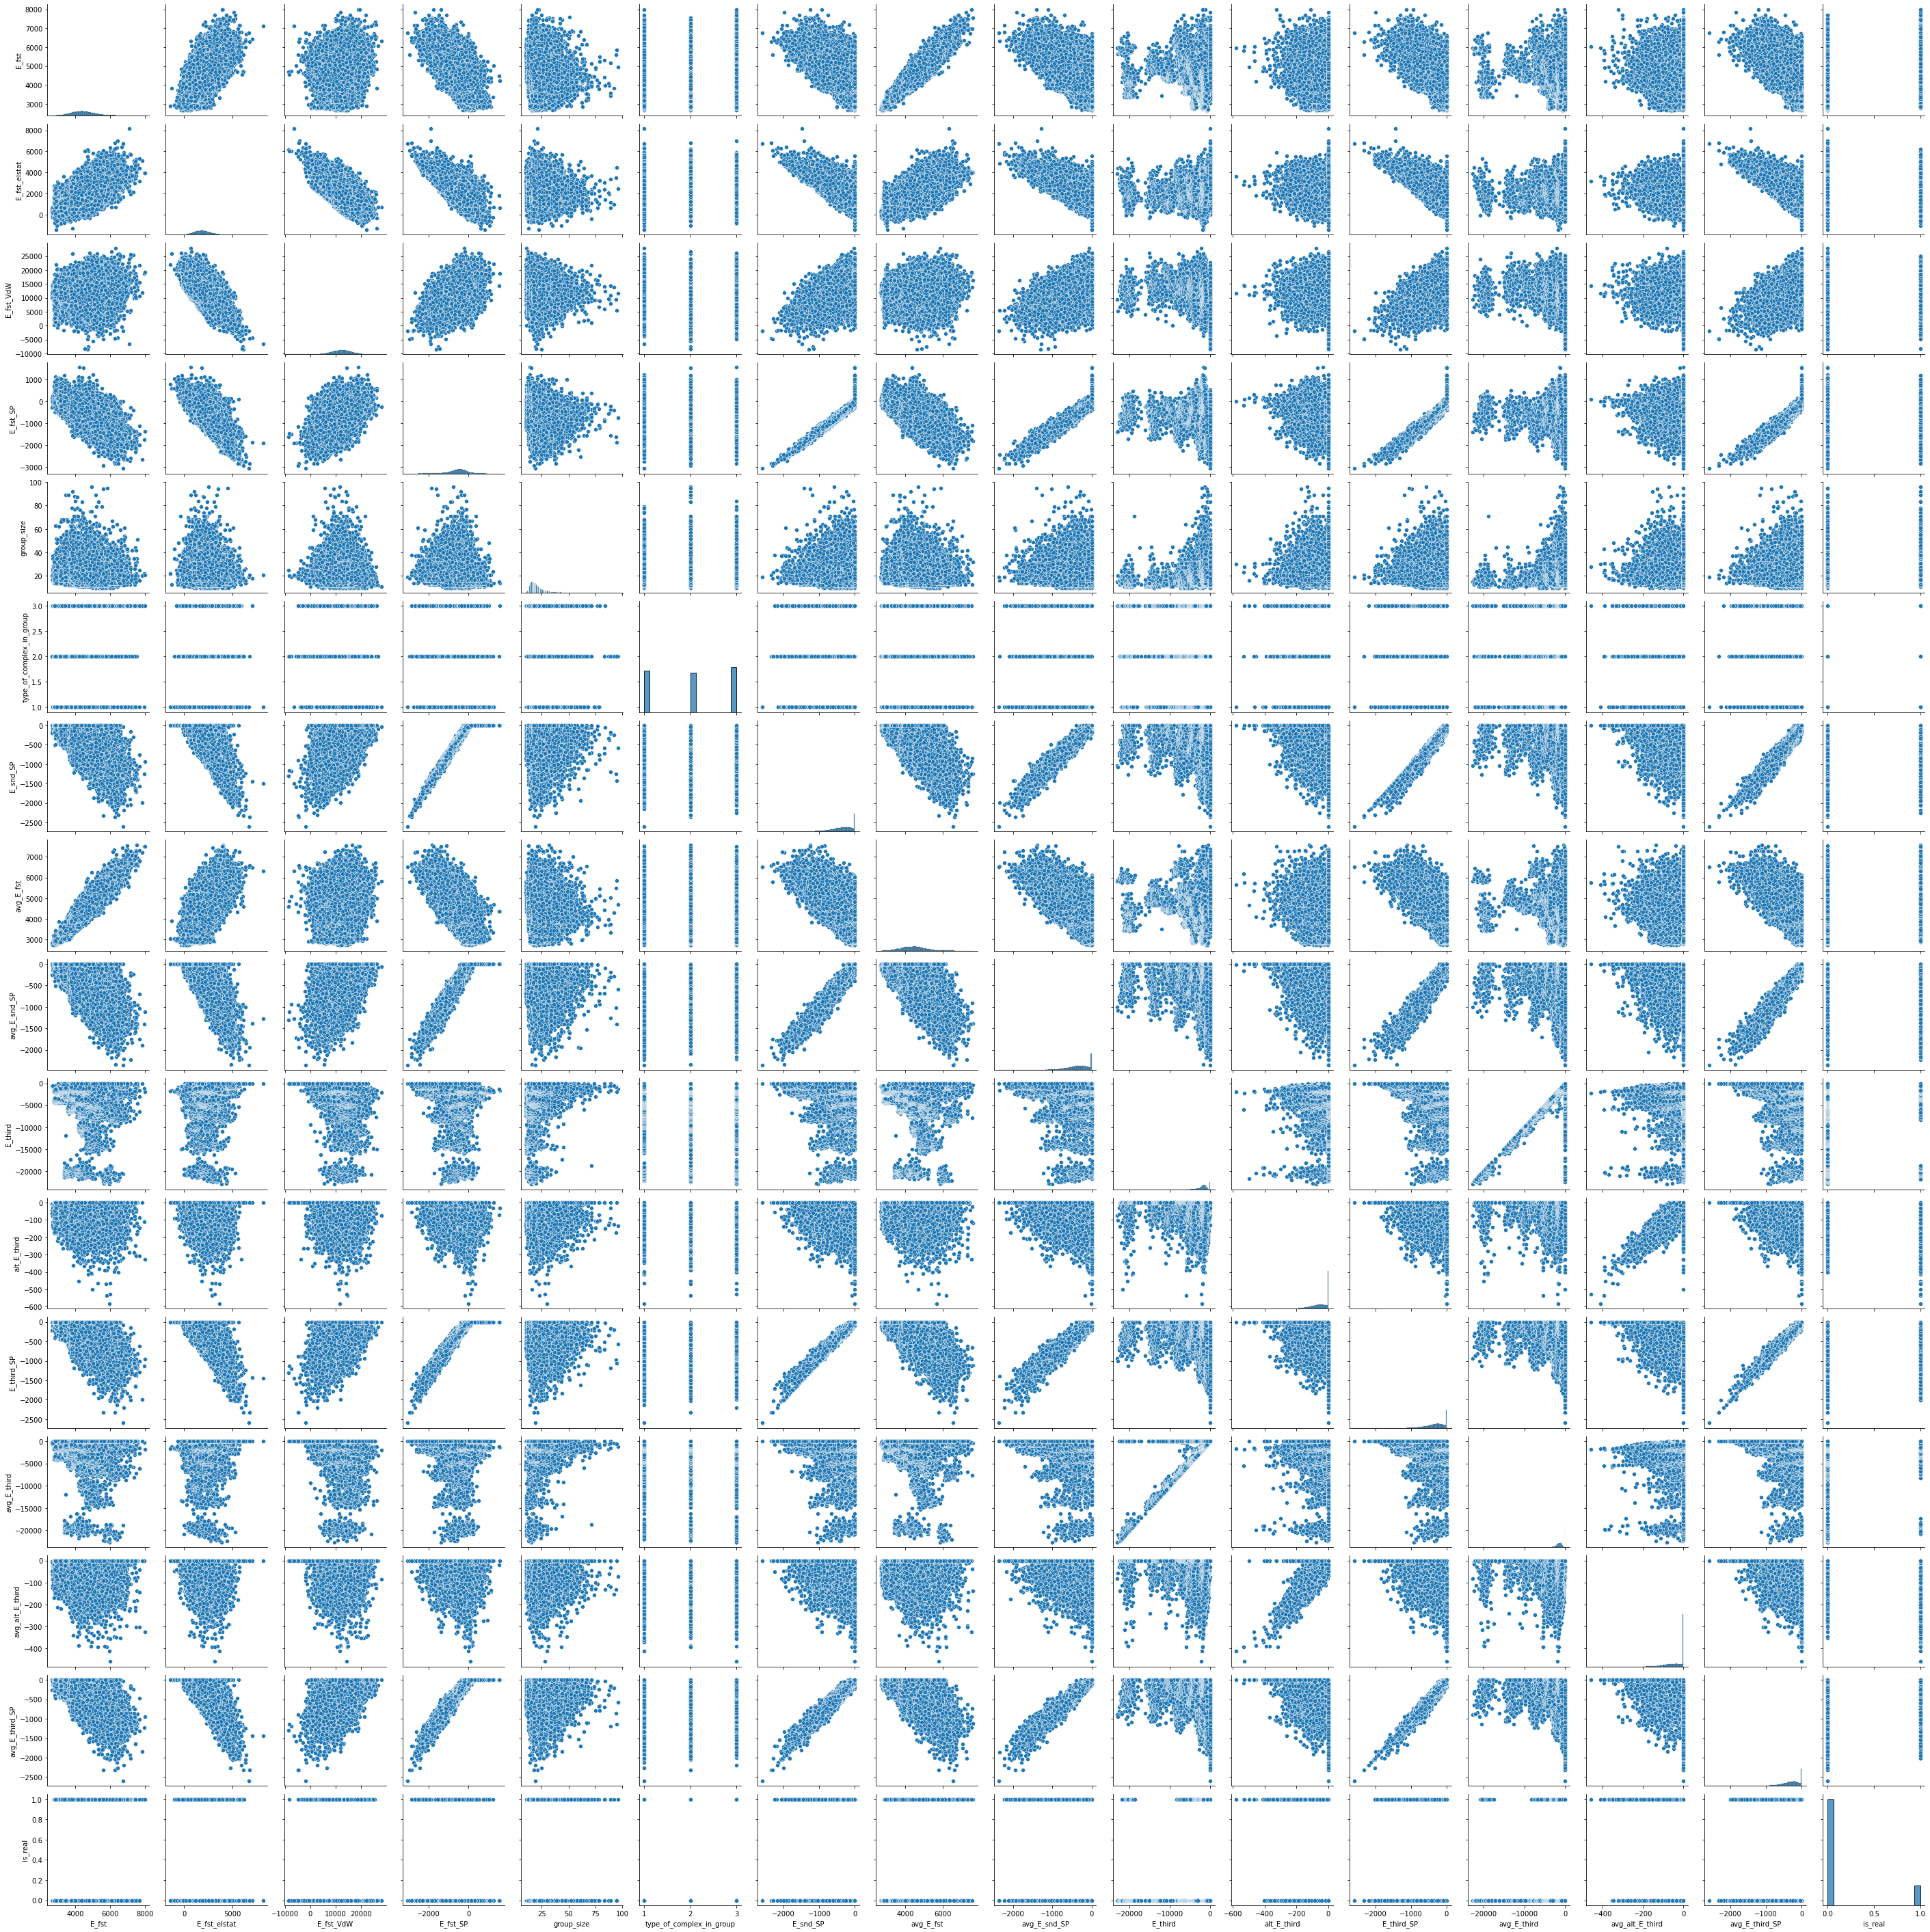

In [37]:
sns.pairplot(baked_data, vars = list(baked_data.columns))

In [18]:
corr = baked_data.corr()
corr

E_fst  E_fst_elstat  E_fst_VdW  E_fst_SP  \
E_fst                     1.000000      0.627550   0.131378 -0.577053   
E_fst_elstat              0.627550      1.000000  -0.687951 -0.686444   
E_fst_VdW                 0.131378     -0.687951   1.000000  0.378738   
E_fst_SP                 -0.577053     -0.686444   0.378738  1.000000   
group_size               -0.013019      0.054067  -0.088937 -0.120449   
type_of_complex_in_group  0.038522      0.001520   0.034239 -0.005600   
E_snd_SP                 -0.578588     -0.703061   0.395268  0.972431   
avg_E_fst                 0.944903      0.612990   0.094666 -0.602959   
avg_E_snd_SP             -0.582090     -0.682406   0.365132  0.954868   
E_third                  -0.108216      0.030417  -0.145646 -0.065433   
alt_E_third              -0.039683     -0.112469   0.090969 -0.106149   
E_third_SP               -0.576141     -0.692508   0.383633  0.960417   
avg_E_third              -0.071329      0.053816  -0.140724 -0.082250   
avg_alt_E_third           0.001243     -0.058178   0.061774 -0.124275   
avg_E_third_SP           -0.575811     -0.687113   0.376761  0.953693   
is_real                   0.101355      0.060346   0.018645 -0.042929   

                          group_size  type_of_complex_in_group  E_snd_SP  \
E_fst                      -0.013019                  0.038522 -0.578588   
E_fst_elstat                0.054067                  0.001520 -0.703061   
E_fst_VdW                  -0.088937                  0.034239  0.395268   
E_fst_SP                   -0.120449                 -0.005600  0.972431   
group_size                  1.000000                  0.006969 -0.114306   
type_of_complex_in_group    0.006969                  1.000000 -0.003659   
E_snd_SP                   -0.114306                 -0.003659  1.000000   
avg_E_fst                  -0.018176                  0.004708 -0.607362   
avg_E_snd_SP               -0.117012                 -0.000101  0.976823   
E_third                     0.147442                 -0.004211 -0.076508   
alt_E_third                -0.141523                 -0.018163 -0.106300   
E_third_SP                 -0.120046                 -0.003601  0.982967   
avg_E_third                 0.128514                  0.001654 -0.092903   
avg_alt_E_third            -0.138449                 -0.001000 -0.128031   
avg_E_third_SP             -0.118497                 -0.004077  0.975641   
is_real                     0.270344                  0.008570 -0.046435   

                          avg_E_fst  avg_E_snd_SP   E_third  alt_E_third  \
E_fst                      0.944903     -0.582090 -0.108216    -0.039683   
E_fst_elstat               0.612990     -0.682406  0.030417    -0.112469   
E_fst_VdW                  0.094666      0.365132 -0.145646     0.090969   
E_fst_SP                  -0.602959      0.954868 -0.065433    -0.106149   
group_size                -0.018176     -0.117012  0.147442    -0.141523   
type_of_complex_in_group   0.004708     -0.000101 -0.004211    -0.018163   
E_snd_SP                  -0.607362      0.976823 -0.076508    -0.106300   
avg_E_fst                  1.000000     -0.622371 -0.115479    -0.005955   
avg_E_snd_SP              -0.622371      1.000000 -0.076342    -0.121955   
E_third                   -0.115479     -0.076342  1.000000     0.075134   
alt_E_third               -0.005955     -0.121955  0.075134     1.000000   
E_third_SP                -0.605468      0.964759 -0.086176    -0.111710   
avg_E_third               -0.077431     -0.095205  0.920821     0.066940   
avg_alt_E_third            0.020806     -0.137770  0.076764     0.846560   
avg_E_third_SP            -0.611270      0.975241 -0.088017    -0.120002   
is_real                    0.095158     -0.045436  0.063478    -0.249754   

                          E_third_SP  avg_E_third  avg_alt_E_third  \
E_fst                      -0.576141    -0.071329         0.001243   
E_fst_elstat               -0.692508     0.053816        -0.0

<AxesSubplot:>

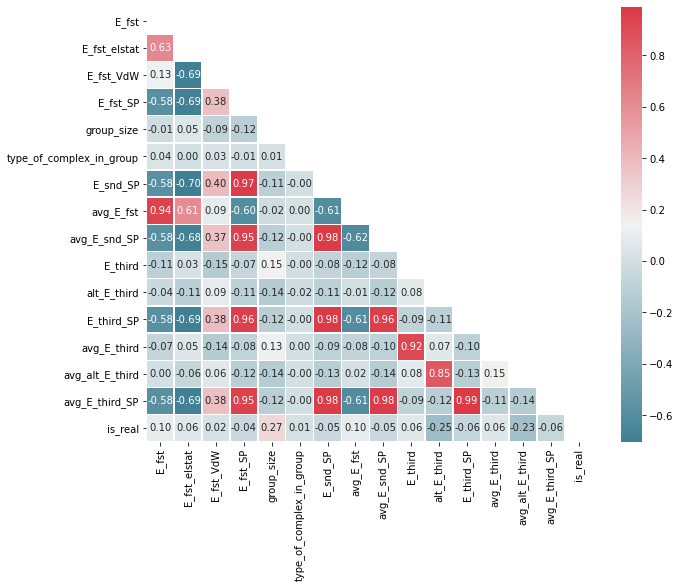

In [42]:
f, a = plt.subplots(figsize=(10, 8))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
dropvals = np.zeros_like(corr)
dropvals[np.triu_indices_from(dropvals)] = True
sns.heatmap(corr, cmap= colormap, linewidths=.5, annot=True, fmt=".2f", mask = dropvals)


In [19]:
plt.show()

## Intercorrelation

We can notice intercorrelation (>0.4) between 

* E_fst_elstat ~ E_fst (0.63)
* E_fst_SP ~ E_fst (-0.58)
* E_snd_SP ~ E_fst (-0.58)
* avg_E_fst ~ E_fst (0.94)
* avg_E_snd_SP ~ E_fst (0.58)
* E_third_SP ~ E_fst (-0.58)
* avg_E_third_SP ~ E_fst (-0.58)
* etc..

There are correlation between averages and direct values, but also there are correlation between Van-Der-Wales force and Statistical Potential, and we can see that the most affective parameter on `is_real` is `group_size`

## Variance Inflation Factor

Therefore, we could either remove these variables or calculate VIF:

* VIF starts at 1 and has no upper limit
* VIF = 1: indicates no correlation between an independent variable and the other variables
* VIF > 5 or 10: indicates high multicollinearity between an independent variable and the others



In [20]:
def calc_VIF(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif


In [21]:
X = baked_data.iloc[:,:-1] # without dependent variable

In [22]:
calc_VIF(X)

variables           VIF
0                      E_fst  1.195381e+12
1               E_fst_elstat  2.707792e+11
2                  E_fst_VdW  3.843318e+11
3                   E_fst_SP  5.671813e+08
4                 group_size  8.055909e+00
5   type_of_complex_in_group  6.544282e+00
6                   E_snd_SP  1.474980e+02
7                  avg_E_fst  3.939975e+02
8               avg_E_snd_SP  8.453435e+01
9                    E_third  1.434241e+01
10               alt_E_third  8.048846e+00
11                E_third_SP  1.903192e+02
12               avg_E_third  1.292942e+01
13           avg_alt_E_third  7.003295e+00
14            avg_E_third_SP  1.698062e+02

In [23]:
X = baked_data.drop(['group_size', 'type_of_complex_in_group', 'avg_E_snd_SP', 'alt_E_third', 'avg_alt_E_third'], axis=1)

calc_VIF(X)

variables           VIF
0            E_fst  1.195223e+12
1     E_fst_elstat  2.707466e+11
2        E_fst_VdW  3.842990e+11
3         E_fst_SP  5.671105e+08
4         E_snd_SP  1.062391e+02
5        avg_E_fst  3.804136e+02
6          E_third  1.246997e+01
7       E_third_SP  1.605181e+02
8      avg_E_third  1.098030e+01
9   avg_E_third_SP  1.141057e+02
10         is_real  1.212586e+00

In [24]:
formula = "is_real ~ E_fst + group_size + C(type_of_complex_in_group) + avg_E_fst + E_third"
mlr = ols(formula, data = baked_data)
mlr_estimates = mlr.fit()

print(mlr_estimates.summary())

                            OLS Regression Results                            
Dep. Variable:                is_real   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     490.1
Date:                Tue, 23 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:34:28   Log-Likelihood:                -11305.
No. Observations:               31461   AIC:                         2.262e+04
Df Residuals:                   31454   BIC:                         2.268e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

# MLR outtakes (scalar prediction)

* Complex `border` has 4x higher chanse in being real, than centroid
* Group size have `0.0127` correlation with is_real (as we early noticed, it's correlated)

In [25]:
formula = "is_real ~ E_fst + group_size + C(type_of_complex_in_group) + avg_E_fst + E_third"
logit_model = logit(formula, data = baked_data)
logit_estimates = logit_model.fit()

print(logit_estimates.summary())

Optimization terminated successfully.
         Current function value: 0.395191
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                is_real   No. Observations:                31461
Model:                          Logit   Df Residuals:                    31454
Method:                           MLE   Df Model:                            6
Date:                Tue, 23 Feb 2021   Pseudo R-squ.:                 0.08569
Time:                        16:34:31   Log-Likelihood:                -12433.
converged:                       True   LL-Null:                       -13598.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -5.2135      0.121    -43.25

<AxesSubplot:xlabel='group_size', ylabel='is_real'>

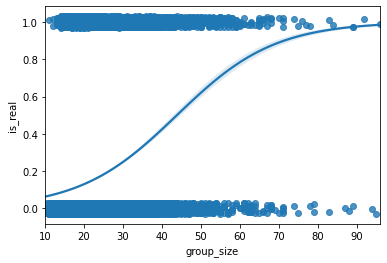

In [26]:
sns.regplot(x = "group_size", y = "is_real", data = baked_data, logistic=True, y_jitter=.03)

In [27]:
round(np.exp(logit_estimates.params), 3)

Intercept                           0.005
C(type_of_complex_in_group)[T.2]    0.927
C(type_of_complex_in_group)[T.3]    1.020
E_fst                               1.000
group_size                          1.082
avg_E_fst                           1.000
E_third                             1.000
dtype: float64

In [28]:
AME = logit_estimates.get_margeff(at = "overall", method = "dydx")
print(AME.summary())

        Logit Marginal Effects       
Dep. Variable:                is_real
Method:                          dydx
At:                           overall
                                      dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
C(type_of_complex_in_group)[T.2]    -0.0091      0.005     -1.809      0.071      -0.019       0.001
C(type_of_complex_in_group)[T.3]     0.0024      0.005      0.514      0.607      -0.007       0.012
E_fst                              3.87e-05   8.16e-06      4.743      0.000    2.27e-05    5.47e-05
group_size                           0.0094      0.000     43.606      0.000       0.009       0.010
avg_E_fst                         1.197e-05    8.7e-06      1.376      0.169   -5.08e-06     2.9e-05
E_third                           9.623e-06   1.18e-06      8.131      0.000     7.3e-06    1.19e-05


## Different approach: Topology <3

    We would use keppler-mapper
    

In [29]:
# Import the class
import kmapper as km
from kmapper import jupyter
from kmapper.cover import Cover
from sklearn import model_selection, metrics, cluster, ensemble
import xgboost

features_all = [c for c in baked_data.columns if c not in ['is_real']]
features = features_all


'''
# Some sample data
from sklearn import datasets
data, _ = datasets.make_circles(n_samples=5000, noise=0.03, factor=0.3)
data = baked_data

# Initialize
mapper = km.KeplerMapper(verbose=1)

# Fit to and transform the data
projected_data = mapper.fit_transform(data, projection=[0,1]) # X-Y axis

# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_data, data, cover=km.Cover(n_cubes=10))

# Visualize it
html = mapper.visualize(graph, path_html="make_circles_keplermapper_output.html",
                 title="make_circles(n_samples=5000, noise=0.03, factor=0.3)")

jupyter.display(path_html="make_circles_keplermapper_output.html")
'''

features

['E_fst',
 'E_fst_elstat',
 'E_fst_VdW',
 'E_fst_SP',
 'group_size',
 'type_of_complex_in_group',
 'E_snd_SP',
 'avg_E_fst',
 'avg_E_snd_SP',
 'E_third',
 'alt_E_third',
 'E_third_SP',
 'avg_E_third',
 'avg_alt_E_third',
 'avg_E_third_SP']

In [30]:
X = np.array(baked_data[features])
X_all = np.array(baked_data[features_all])
y = np.array(baked_data.is_real)
print(X.shape, np.mean(y))

(31461, 15) 0.15555767458122755


In [31]:
splitter = model_selection.StratifiedShuffleSplit(n_splits=1,
                                                 test_size=0.2,
                                                 random_state=0)

for train_index, test_index in splitter.split(X, y):
    X_train, X_holdout = X[train_index], X[test_index]
    X_train_all, S_holdout_all = X_all[train_index], X_all[test_index]
    y_train, y_holdout = y[train_index], y[test_index]
    
print(X_train.shape, X_holdout.shape)

(25168, 15) (6293, 15)


In [42]:
model = xgboost.XGBClassifier(seed=0)

skf = model_selection.StratifiedKFold(n_splits=5,
                                     shuffle=True,
                                     random_state=0)

for i, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    model.fit(X_train_fold, y_train_fold)
    probas = model.predict_proba(X_test_fold)[:,1]
    preds = (probas > 0.5).astype(int)
    
    print("-"*60)
    print("Fold: %d (%s/%s)" %(i, X_train_fold.shape, X_test_fold.shape))
    print(metrics.classification_report(y_test_fold, preds, target_names=["Fake", "Real"]))
    print("Confusion Matrix: \n%s\n"%metrics.confusion_matrix(y_test_fold, preds))
    print("Log loss : %f" % (metrics.log_loss(y_test_fold, probas)))
    print("AUC      : %f" % (metrics.roc_auc_score(y_test_fold, probas)))
    print("Accuracy : %f" % (metrics.accuracy_score(y_test_fold, preds)))
    print("Precision: %f" % (metrics.precision_score(y_test_fold, preds)))
    print("Recall   : %f" % (metrics.recall_score(y_test_fold, preds)))
    print("F1-score : %f" % (metrics.f1_score(y_test_fold, preds)))

/home/gleb/.local/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:11:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
------------------------------------------------------------
Fold: 0 ((20134, 15)/(5034, 15))
              precision    recall  f1-score   support

        Fake       0.88      0.97      0.92      4251
        Real       0.63      0.28      0.39       783

    accuracy                           0.86      5034
   macro avg       0.76      0.63      0.66      5034
weighted avg       0.84      0.86      0.84      5034

Confusion Matrix: 
[[4124  127]
 [ 563  220]]

Log loss : 0.354283
AUC      : 0.790695
Accuracy : 0.862932
Precision: 0.634006
Recall   : 0.280971
F1-score : 0.389381
[17:11:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 

/home/gleb/.local/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


------------------------------------------------------------
Fold: 1 ((20134, 15)/(5034, 15))
              precision    recall  f1-score   support

        Fake       0.88      0.98      0.93      4251
        Real       0.68      0.29      0.41       783

    accuracy                           0.87      5034
   macro avg       0.78      0.63      0.67      5034
weighted avg       0.85      0.87      0.85      5034

Confusion Matrix: 
[[4146  105]
 [ 555  228]]

Log loss : 0.348023
AUC      : 0.793009
Accuracy : 0.868892
Precision: 0.684685
Recall   : 0.291188
F1-score : 0.408602
[17:11:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/gleb/.local/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


------------------------------------------------------------
Fold: 2 ((20134, 15)/(5034, 15))
              precision    recall  f1-score   support

        Fake       0.88      0.97      0.92      4251
        Real       0.62      0.26      0.37       783

    accuracy                           0.86      5034
   macro avg       0.75      0.62      0.65      5034
weighted avg       0.84      0.86      0.84      5034

Confusion Matrix: 
[[4123  128]
 [ 577  206]]

Log loss : 0.355231
AUC      : 0.786370
Accuracy : 0.859952
Precision: 0.616766
Recall   : 0.263091
F1-score : 0.368845
[17:11:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/gleb/.local/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


------------------------------------------------------------
Fold: 3 ((20135, 15)/(5033, 15))
              precision    recall  f1-score   support

        Fake       0.88      0.97      0.92      4250
        Real       0.65      0.26      0.38       783

    accuracy                           0.86      5033
   macro avg       0.77      0.62      0.65      5033
weighted avg       0.84      0.86      0.84      5033

Confusion Matrix: 
[[4140  110]
 [ 576  207]]

Log loss : 0.350454
AUC      : 0.794679
Accuracy : 0.863700
Precision: 0.652997
Recall   : 0.264368
F1-score : 0.376364
[17:11:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/gleb/.local/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


------------------------------------------------------------
Fold: 4 ((20135, 15)/(5033, 15))
              precision    recall  f1-score   support

        Fake       0.88      0.97      0.92      4250
        Real       0.63      0.28      0.39       783

    accuracy                           0.86      5033
   macro avg       0.76      0.62      0.65      5033
weighted avg       0.84      0.86      0.84      5033

Confusion Matrix: 
[[4125  125]
 [ 566  217]]

Log loss : 0.346621
AUC      : 0.799869
Accuracy : 0.862706
Precision: 0.634503
Recall   : 0.277139
F1-score : 0.385778


In [44]:
model.fit(X_train, y_train)
probas = model.predict_proba(X_holdout)[:,1]
preds = (probas > 0.5).astype(int)

print(metrics.classification_report(y_holdout, preds, target_names=["Fake", "Real"]))
print("Confusion Matrix: \n%s\n"%metrics.confusion_matrix(y_holdout, preds))
print("Log loss : %f" % (metrics.log_loss(y_holdout, probas)))
print("AUC      : %f" % (metrics.roc_auc_score(y_holdout, probas)))
print("Accuracy : %f" % (metrics.accuracy_score(y_holdout, preds)))
print("Precision: %f" % (metrics.precision_score(y_holdout, preds)))
print("Recall   : %f" % (metrics.recall_score(y_holdout, preds)))
print("F1-score : %f" % (metrics.f1_score(y_holdout, preds)))

[17:15:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

        Fake       0.88      0.97      0.92      5314
        Real       0.65      0.28      0.40       979

    accuracy                           0.86      6293
   macro avg       0.77      0.63      0.66      6293
weighted avg       0.84      0.86      0.84      6293

Confusion Matrix: 
[[5164  150]
 [ 700  279]]

Log loss : 0.347869
AUC      : 0.797996
Accuracy : 0.864929
Precision: 0.650350
Recall   : 0.284985
F1-score : 0.396307


In [39]:
projector = ensemble.IsolationForest(random_state=0, n_jobs=-1)
projector.fit(X)
lens1 = projector.decision_function(X)

mapper = km.KeplerMapper(verbose=3)
lens2 = mapper.fit_transform(X, projection="knn_distance_5")
lens = np.c_[lens1, lens2]
cov = Cover(n_cubes=100, perc_overlap=0.5)
G = mapper.map(lens,
               X,
               clusterer=cluster.AgglomerativeClustering(3), 
               cover= cov)
_ = mapper.visualize(G,
                    color_values=y,
                    custom_tooltips=y,
                    path_html='docking_out.html',
                    title='Biological docking: 100 hypercubes')

KeplerMapper(verbose=3)
..Composing projection pipeline of length 1:
	Projections: knn_distance_5
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (31461, 15)

..Projecting data using: knn_distance_5

..Scaling with: MinMaxScaler()

Mapping on data shaped (31461, 15) using lens shaped (31461, 2)

Minimal points in hypercube before clustering: 3
Creating 10000 hypercubes.
Cube_0 is empty.

Cube_1 is empty.

Cube_2 is empty.

Cube_3 is empty.

Cube_4 is empty.

Cube_5 is empty.

Cube_6 is empty.

Cube_7 is empty.

Cube_8 is empty.

   > Found 3 clusters in hypercube 9.
Cube_10 is empty.

Cube_11 is empty.

Cube_12 is empty.

Cube_13 is empty.

Cube_14 is empty.

Cube_15 is empty.

Cube_16 is empty.

Cube_17 is empty.

   > Found 3 clusters in hypercube 18.
Cube_19 is empty.

Cube_20 is empty.

Cube_21 is empty.

Cube_22 is empty.

Cube_23 is empty.

Cube_24 is empty.

Cube_25 is empty.

Cube_26 is empty.

Cube_27 is empty.

Cube_28 is empty.

Cube_29 is empt

Cube_985 is empty.

Cube_986 is empty.

   > Found 3 clusters in hypercube 987.
Cube_988 is empty.

Cube_989 is empty.

Cube_990 is empty.

Cube_991 is empty.

Cube_992 is empty.

   > Found 3 clusters in hypercube 993.
   > Found 3 clusters in hypercube 994.
Cube_995 is empty.

Cube_996 is empty.

Cube_997 is empty.

Cube_998 is empty.

Cube_999 is empty.

Cube_1000 is empty.

Cube_1001 is empty.

Cube_1002 is empty.

Cube_1003 is empty.

Cube_1004 is empty.

Cube_1005 is empty.

Cube_1006 is empty.

   > Found 3 clusters in hypercube 1007.
   > Found 3 clusters in hypercube 1008.
   > Found 3 clusters in hypercube 1009.
   > Found 3 clusters in hypercube 1010.
   > Found 3 clusters in hypercube 1011.
   > Found 3 clusters in hypercube 1012.
   > Found 3 clusters in hypercube 1013.
   > Found 3 clusters in hypercube 1014.
   > Found 3 clusters in hypercube 1015.
   > Found 3 clusters in hypercube 1016.
   > Found 3 clusters in hypercube 1017.
   > Found 3 clusters in hypercube 1018.
 

Cube_1855 is empty.

Cube_1856 is empty.

Cube_1857 is empty.

Cube_1858 is empty.

Cube_1859 is empty.

Cube_1860 is empty.

   > Found 3 clusters in hypercube 1861.
   > Found 3 clusters in hypercube 1862.
   > Found 3 clusters in hypercube 1863.
   > Found 3 clusters in hypercube 1864.
   > Found 3 clusters in hypercube 1865.
   > Found 3 clusters in hypercube 1866.
   > Found 3 clusters in hypercube 1867.
   > Found 3 clusters in hypercube 1868.
   > Found 3 clusters in hypercube 1869.
   > Found 3 clusters in hypercube 1870.
   > Found 3 clusters in hypercube 1871.
   > Found 3 clusters in hypercube 1872.
   > Found 3 clusters in hypercube 1873.
   > Found 3 clusters in hypercube 1874.
   > Found 3 clusters in hypercube 1875.
   > Found 3 clusters in hypercube 1876.
   > Found 3 clusters in hypercube 1877.
   > Found 3 clusters in hypercube 1878.
   > Found 3 clusters in hypercube 1879.
   > Found 3 clusters in hypercube 1880.
   > Found 3 clusters in hypercube 1881.
   > Found 3 

   > Found 3 clusters in hypercube 2378.
   > Found 3 clusters in hypercube 2379.
   > Found 3 clusters in hypercube 2380.
   > Found 3 clusters in hypercube 2381.
   > Found 3 clusters in hypercube 2382.
   > Found 3 clusters in hypercube 2383.
   > Found 3 clusters in hypercube 2384.
   > Found 3 clusters in hypercube 2385.
   > Found 3 clusters in hypercube 2386.
   > Found 3 clusters in hypercube 2387.
   > Found 3 clusters in hypercube 2388.
   > Found 3 clusters in hypercube 2389.
   > Found 3 clusters in hypercube 2390.
   > Found 3 clusters in hypercube 2391.
   > Found 3 clusters in hypercube 2392.
   > Found 3 clusters in hypercube 2393.
   > Found 3 clusters in hypercube 2394.
   > Found 3 clusters in hypercube 2395.
Cube_2396 is empty.

Cube_2397 is empty.

   > Found 3 clusters in hypercube 2398.
   > Found 3 clusters in hypercube 2399.
Cube_2400 is empty.

Cube_2401 is empty.

Cube_2402 is empty.

Cube_2403 is empty.

   > Found 3 clusters in hypercube 2404.
Cube_2405 is 

   > Found 3 clusters in hypercube 2690.
   > Found 3 clusters in hypercube 2691.
   > Found 3 clusters in hypercube 2692.
   > Found 3 clusters in hypercube 2693.
   > Found 3 clusters in hypercube 2694.
   > Found 3 clusters in hypercube 2695.
   > Found 3 clusters in hypercube 2696.
   > Found 3 clusters in hypercube 2697.
   > Found 3 clusters in hypercube 2698.
   > Found 3 clusters in hypercube 2699.
   > Found 3 clusters in hypercube 2700.
   > Found 3 clusters in hypercube 2701.
   > Found 3 clusters in hypercube 2702.
   > Found 3 clusters in hypercube 2703.
   > Found 3 clusters in hypercube 2704.
   > Found 3 clusters in hypercube 2705.
Cube_2706 is empty.

   > Found 3 clusters in hypercube 2707.
   > Found 3 clusters in hypercube 2708.
Cube_2709 is empty.

Cube_2710 is empty.

Cube_2711 is empty.

Cube_2712 is empty.

   > Found 3 clusters in hypercube 2713.
   > Found 3 clusters in hypercube 2714.
   > Found 3 clusters in hypercube 2715.
   > Found 3 clusters in hypercube


Created 18330 edges and 5148 nodes in 0:00:17.041973.
Wrote visualization to: docking_out.html
